In [1]:
import pandas as pd
import matplotlib. pyplot as plt
%matplotlib inline
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import shapefile

In [2]:
sf = shapefile.Reader("2011_Dist.shp")
len(sf.shapes())
#sf.records()[274:288]
matching = [s for s in sf.records() if "Kerala" in s]
#type(sf.records())
matching

[Record #7: ['Alappuzha', 'Kerala', 32, 11, 598],
 Record #173: ['Ernakulam', 'Kerala', 32, 8, 595],
 Record #232: ['Idukki', 'Kerala', 32, 9, 596],
 Record #277: ['Kannur', 'Kerala', 32, 2, 589],
 Record #288: ['Kasaragod', 'Kerala', 32, 1, 588],
 Record #314: ['Kollam', 'Kerala', 32, 13, 600],
 Record #320: ['Kottayam', 'Kerala', 32, 10, 597],
 Record #321: ['Kozhikode', 'Kerala', 32, 4, 591],
 Record #358: ['Malappuram', 'Kerala', 32, 5, 592],
 Record #422: ['Palakkad', 'Kerala', 32, 6, 593],
 Record #436: ['Pathanamthitta', 'Kerala', 32, 12, 599],
 Record #567: ['Thiruvananthapuram', 'Kerala', 32, 14, 601],
 Record #571: ['Thrissur', 'Kerala', 32, 7, 594],
 Record #610: ['Wayanad', 'Kerala', 32, 3, 590]]

In [3]:
import fiona
import geopandas as gpd

def getRows(fn, idxList):
    reader = fiona.open(fn)
    return gpd.GeoDataFrame.from_features([reader[x] for x in idxList])

keepIndexes = [7, 173, 232, 277, 288, 314, 320, 321, 358, 422, 436, 567, 571, 610]  # list of indexes from shp file

Kerala_rows = getRows("2011_Dist.shp", keepIndexes)

In [4]:
Kerala_rows

,geometry,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode
0,"POLYGON ((76.37333911957222 9.835648344818413,...",Alappuzha,Kerala,32,11,598
1,"POLYGON ((76.68924459922391 10.26720683638176,...",Ernakulam,Kerala,32,8,595
2,"POLYGON ((77.28895175087217 10.22972510945544,...",Idukki,Kerala,32,9,596
3,"POLYGON ((75.46996734691864 12.30048770782801,...",Kannur,Kerala,32,2,589
4,"POLYGON ((75.41666663772126 12.50165966965263,...",Kasaragod,Kerala,32,1,588
5,"POLYGON ((77.20859896445621 9.070532194132657,...",Kollam,Kerala,32,13,600
6,"POLYGON ((76.63309043894206 9.855654812858326,...",Kottayam,Kerala,32,10,597
7,"POLYGON ((75.53696559410943 11.69274894065332,...",Kozhikode,Kerala,32,4,591
8,"POLYGON ((76.44699463740433 11.20170705806674,...",Malappuram,Kerala,32,5,592
9,"POLYGON ((76.83918109900587 10.33833659159747,...",Palakkad,Kerala,32,6,593


In [5]:
Kerala_rows["DISTRICT"]

0              Alappuzha
1              Ernakulam
2                 Idukki
3                 Kannur
4              Kasaragod
5                 Kollam
6               Kottayam
7              Kozhikode
8             Malappuram
9               Palakkad
10        Pathanamthitta
11    Thiruvananthapuram
12              Thrissur
13               Wayanad
Name: DISTRICT, dtype: object

In [6]:
# Kerala_rows.set_geometry("center", inplace = True)
# print(Kerala_rows.geometry.x, Kerala_rows.geometry.y)

In [7]:
df = pd.read_excel("Covid-19Kerala.xlsx", sheet_name='Active cases')
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)


In [8]:
df.head()

,District,2020-03-09 00:00:00,2020-03-10 00:00:00,2020-03-11 00:00:00,2020-03-12 00:00:00,2020-03-13 00:00:00,2020-03-14 00:00:00,2020-03-15 00:00:00,2020-03-16 00:00:00,2020-03-17 00:00:00,...,2020-04-14 00:00:00,2020-04-15 00:00:00,2020-04-16 00:00:00,2020-04-17 00:00:00,2020-04-18 00:00:00,2020-04-19 00:00:00,sum,Latitude,Longitude,geometry
0,Kasaragod,0,0,0,0,0,0,0,1,1,...,88,84,61,55,53,46,53,12.4000,75.1000,POINT (75.09999999999999 12.4)
1,Kannur,1,1,1,2,2,2,2,2,2,...,40,41,44,44,47,45,47,12.0000,75.5500,POINT (75.55 12)
2,Trivandrum,0,0,0,3,3,3,4,4,4,...,2,2,2,2,2,2,2,8.5241,76.9366,POINT (76.9366 8.524100000000001)
3,Kollam,0,0,0,0,0,0,0,0,0,...,6,5,5,5,5,5,5,8.8932,76.6141,POINT (76.61409999999999 8.8932)
4,Pathanamthitta,5,9,9,9,9,9,9,9,9,...,6,6,6,6,6,6,6,9.2648,76.7870,POINT (76.78700000000001 9.264799999999999)


In [9]:
df.columns[1].strftime('%Y-%m-%d')

'2020-03-09'

C:\Users\sujit\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\plotting.py:389: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


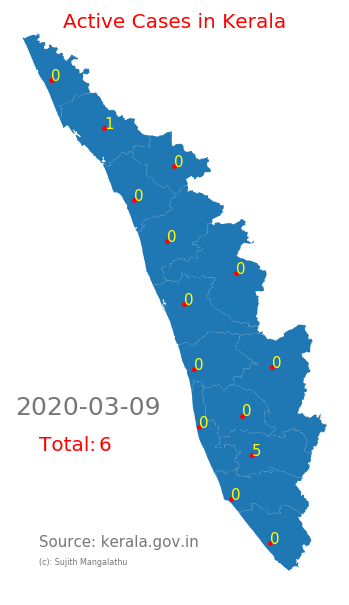

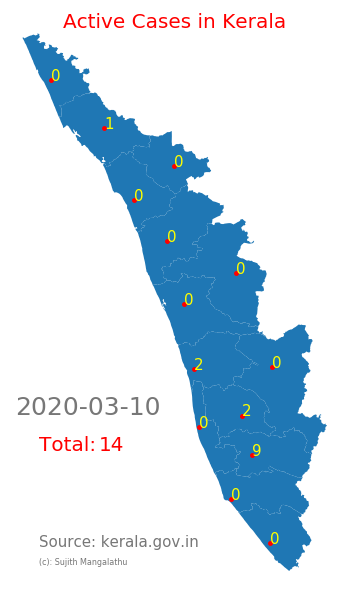

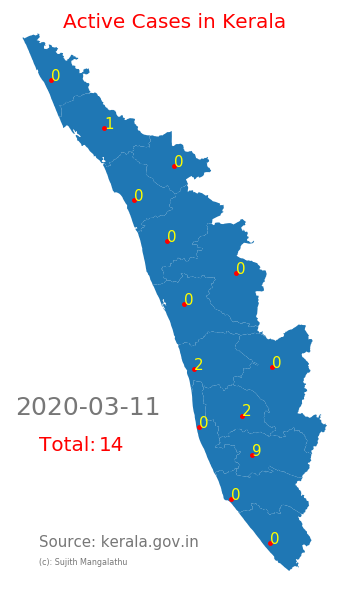

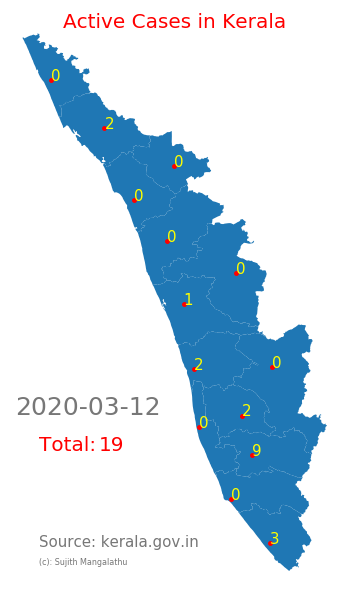

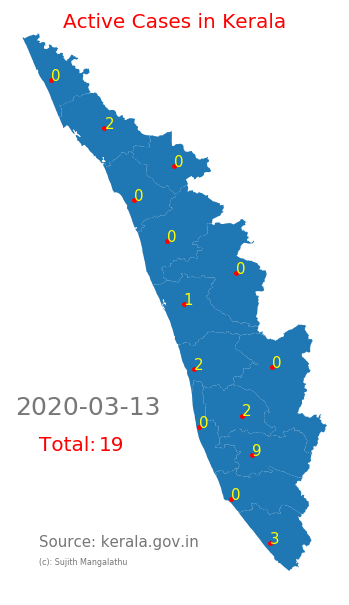

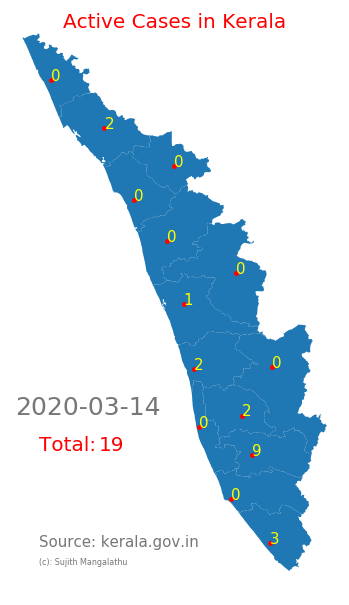

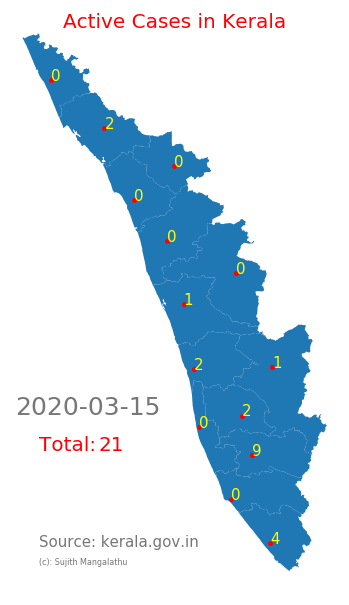

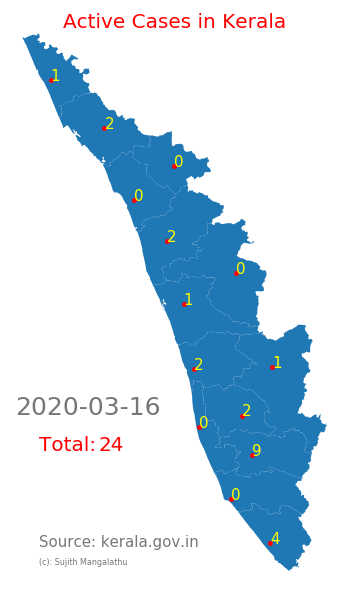

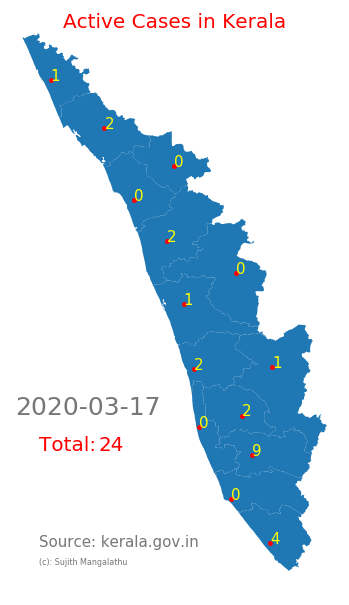

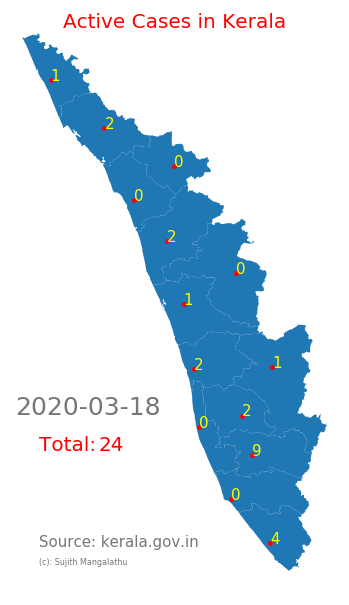

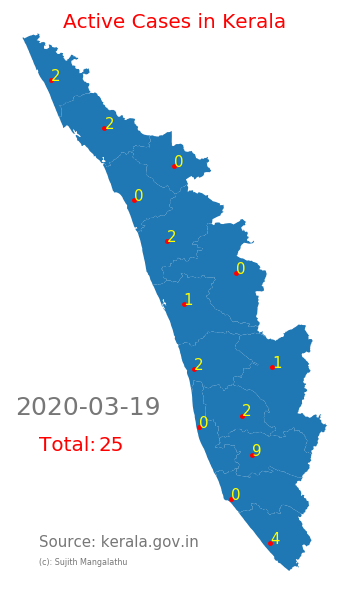

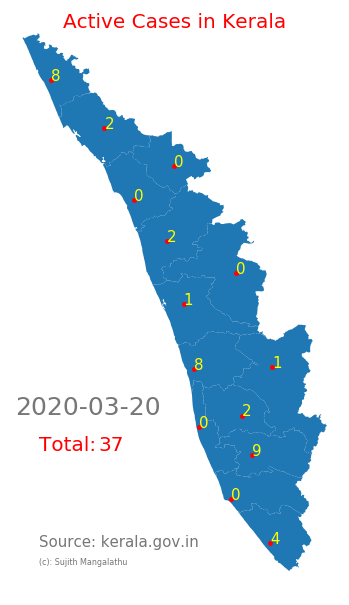

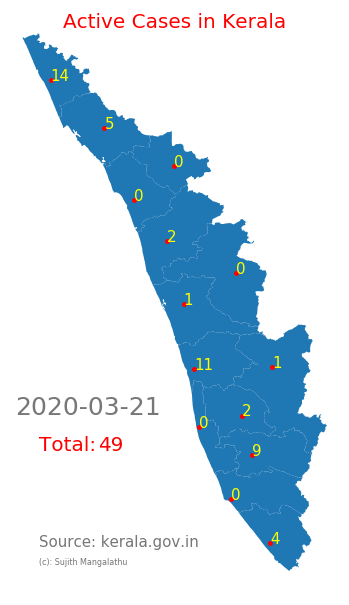

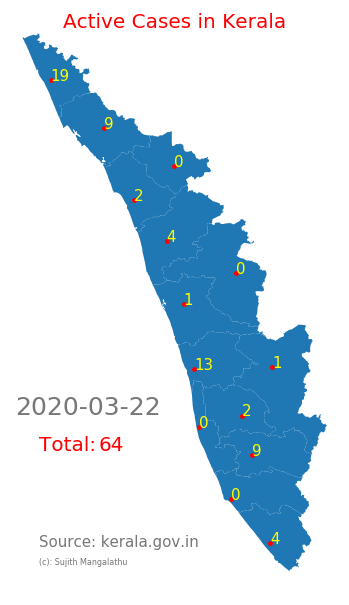

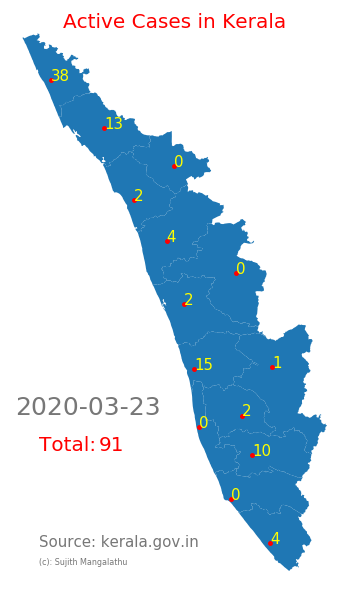

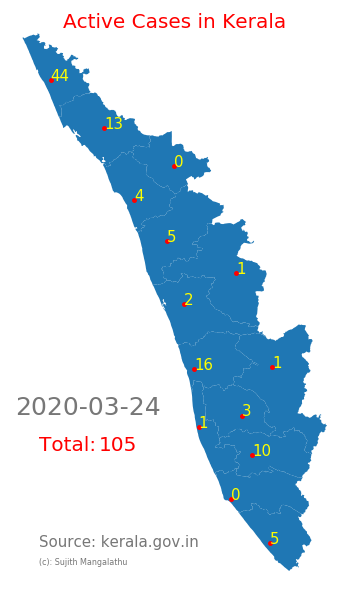

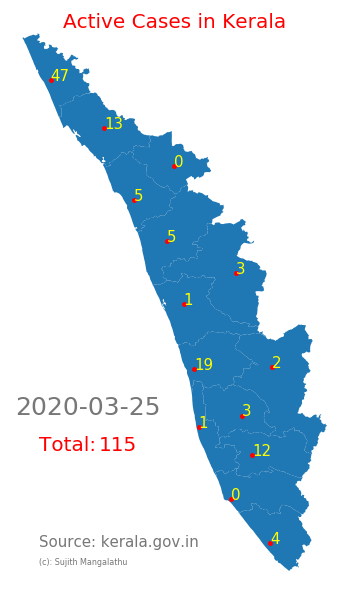

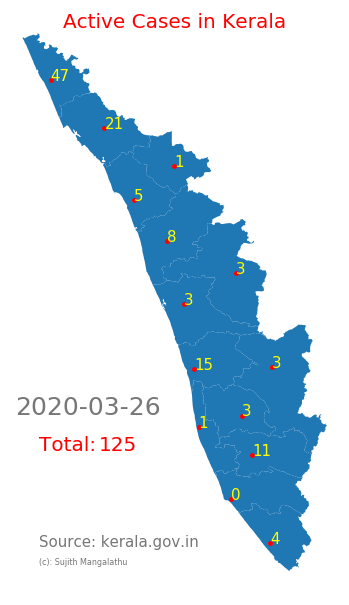

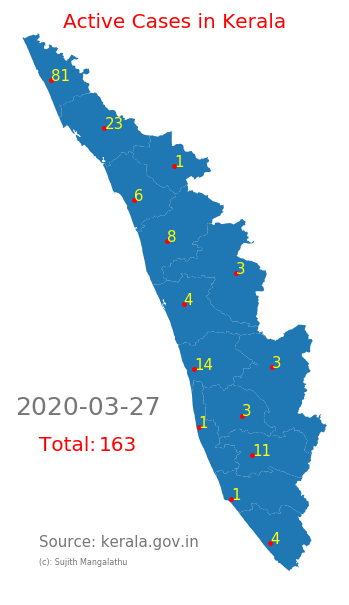

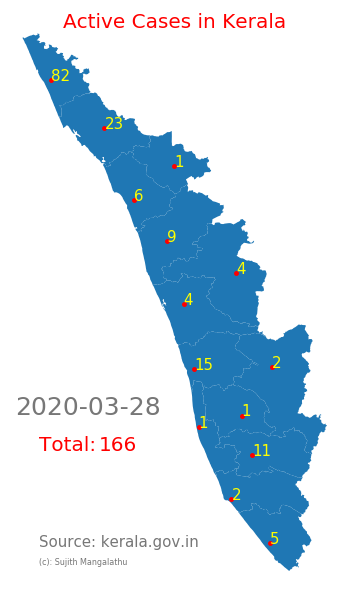

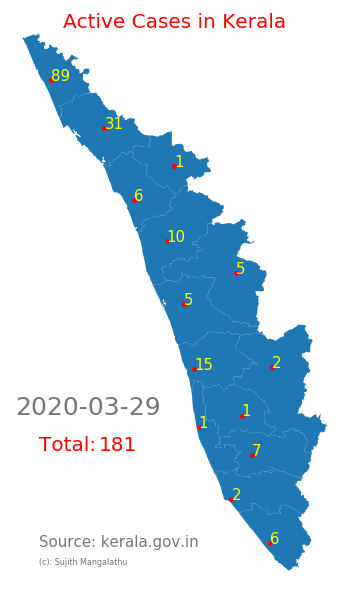

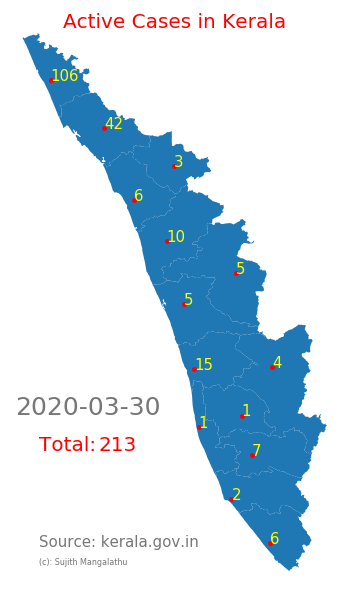

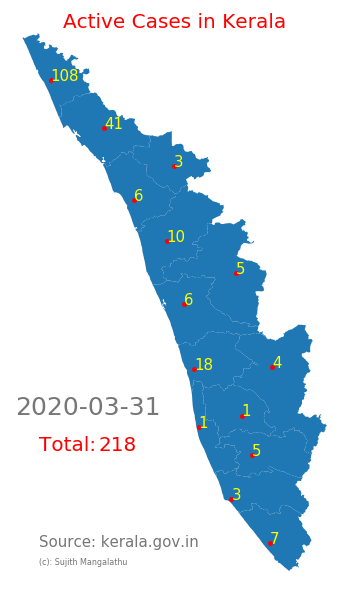

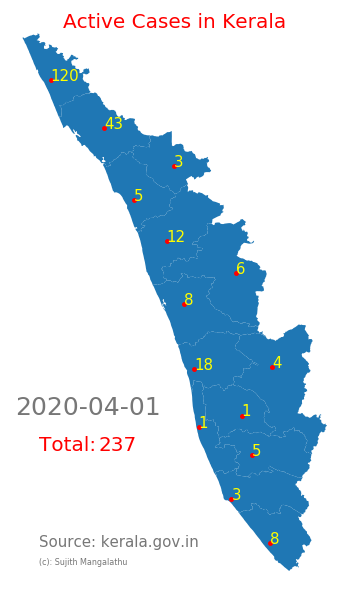

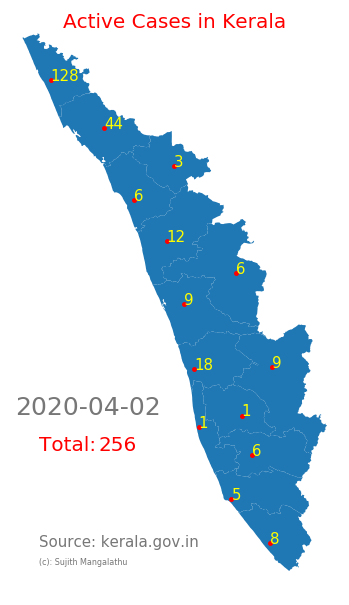

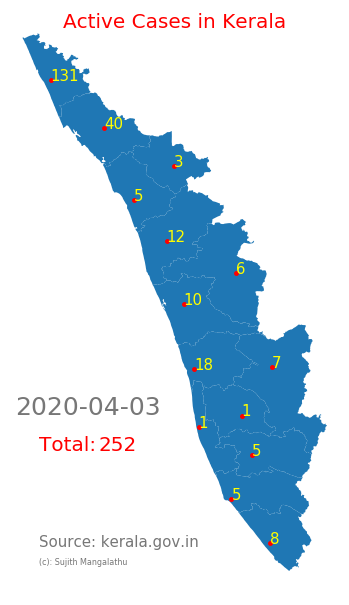

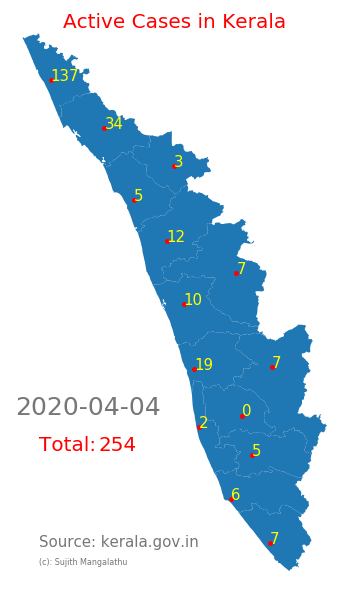

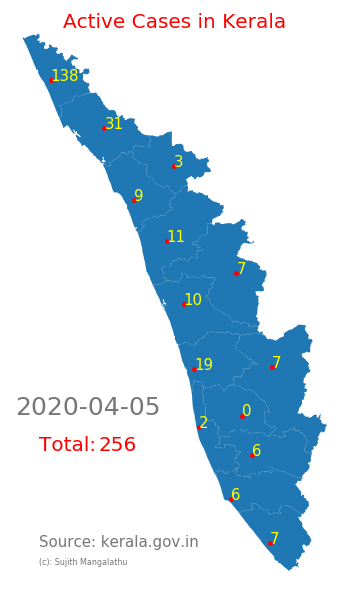

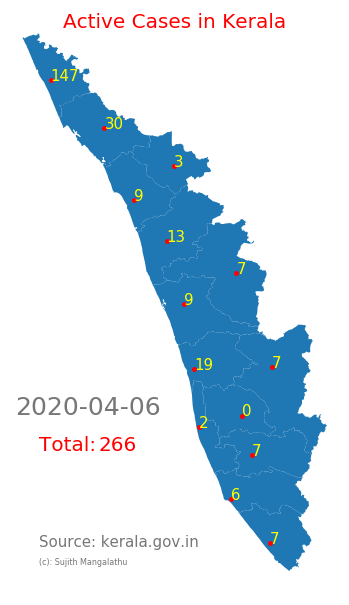

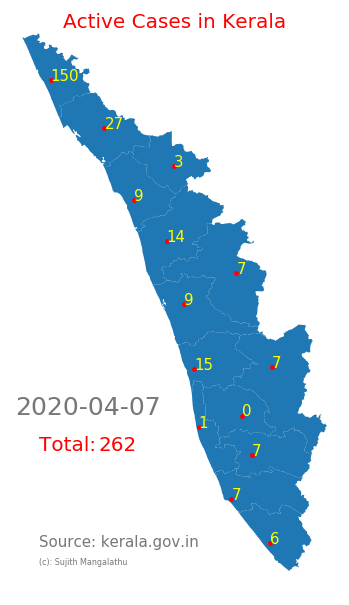

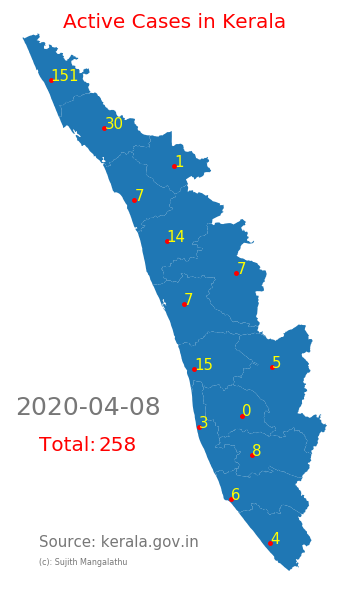

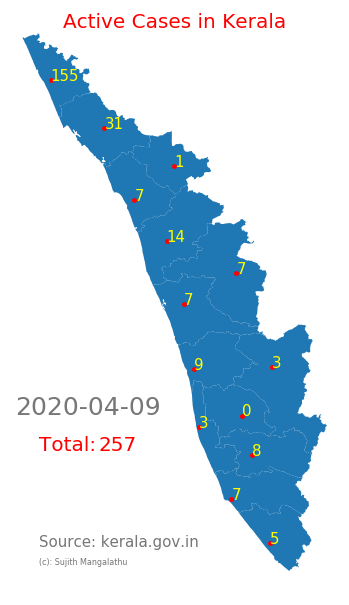

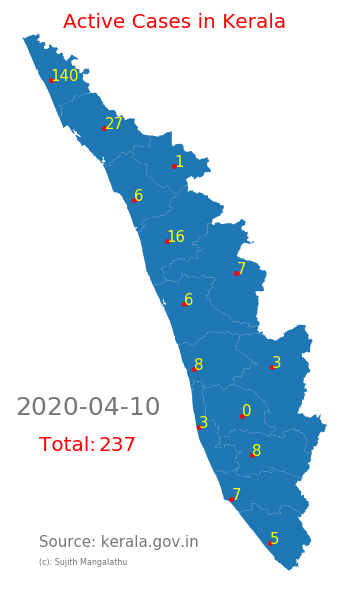

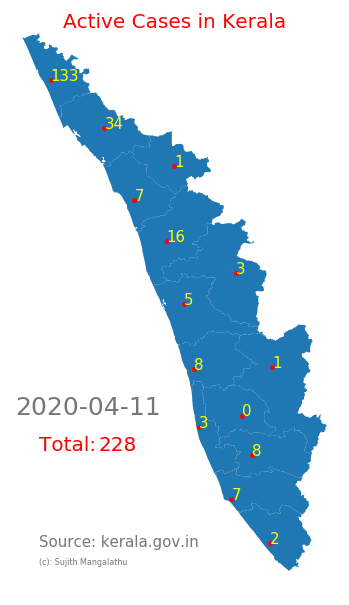

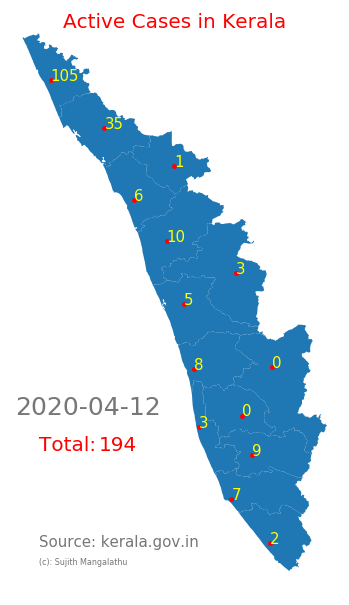

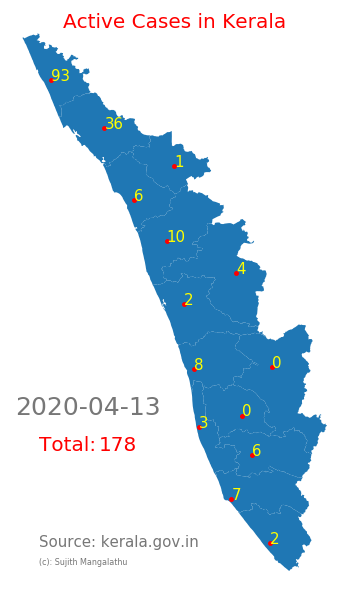

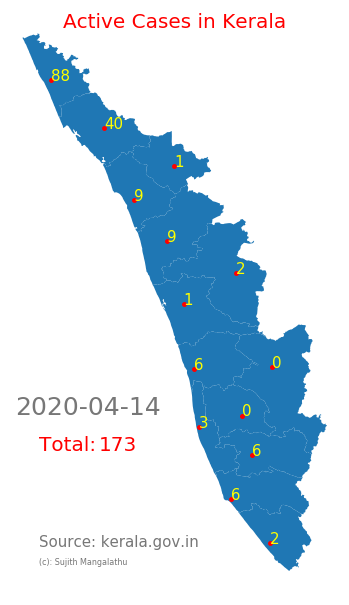

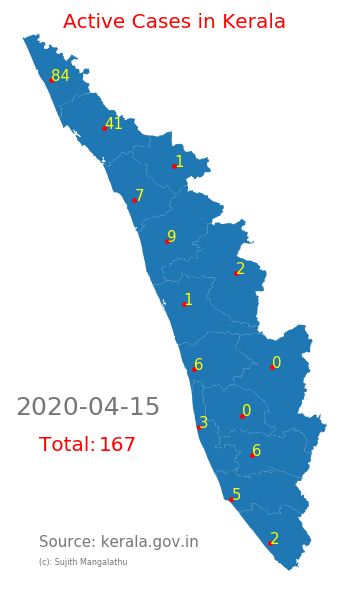

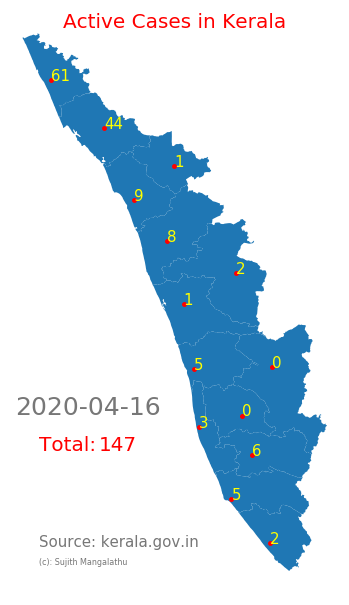

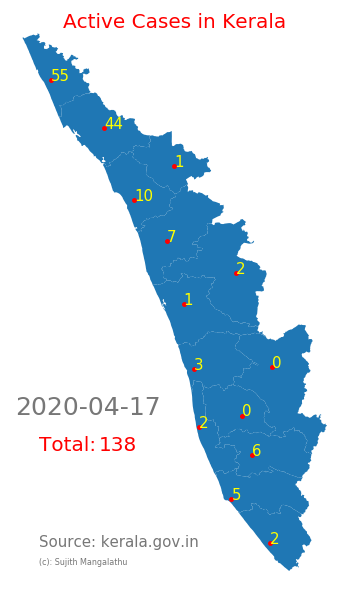

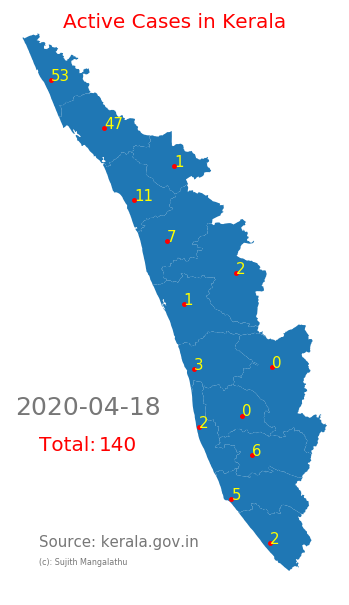

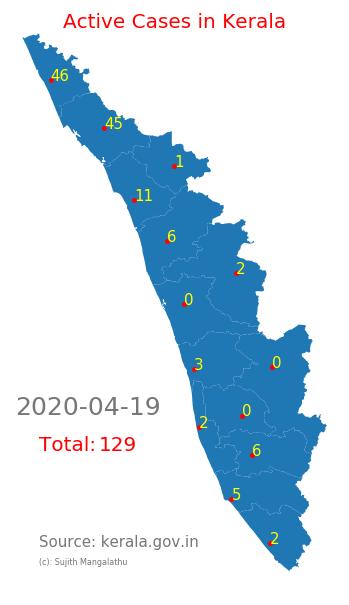

AttributeError: 'str' object has no attribute 'strftime'

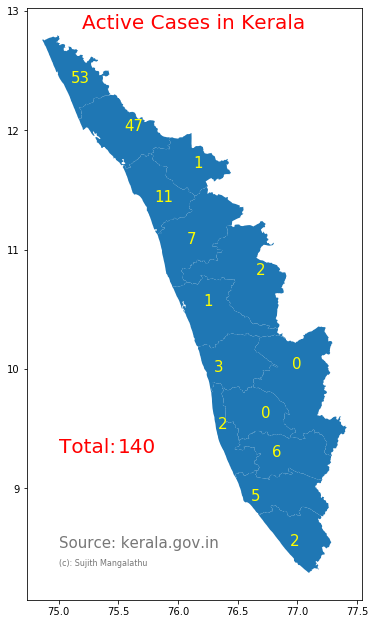

In [10]:
for j in range(1, len(df.columns)):
    f, ax = plt.subplots(figsize=(6,12))
    Kerala_rows.plot(axes=ax, alpha=1.0, linewidth=10)

    texts = []
    i=0

    df['ActiveCases'] = df.iloc[:,j]

    #for x, y in zip(Kerala_rows_points.geometry.x, Kerala_rows_points.geometry.y):
    for x, y in zip(df['Longitude'], df['Latitude']):
        labels= df['ActiveCases'][i]
        #print(labels)
        texts.append(plt.text(x, y, str(labels), {'color': 'yellow', 'fontsize': 15}))
        i=i+1

    plt.text(75, 8.5, 'Source: kerala.gov.in', size=15, color='#777777')
    plt.text(75, 8.35, '(c): Sujith Mangalathu', size=8, color='#777777')

    plt.text(75, 9.3, 'Total:', size=20, color='red')
    plt.text(75.5, 9.3, str(df['ActiveCases'].sum()), size=20, color='red')
    plt.text(75.2, 12.85, 'Active Cases in Kerala', size=20, color='red')

    #df.columns[j].strftime('%Y-%m-%d')
    plt.text(74.8, 9.60, df.columns[j].strftime('%Y-%m-%d'), size=25, color='#777777')

    gdf.plot(axes=ax,marker='o', color='red', markersize=15)
    ax.set_axis_off()


    # ax.text(75, 8.5, 'Source : Kerala.gov.in , Twitter: @sujithmss',size=20, transform=ax.transAxes, color='#777777', ha='right',
    #                  bbox=dict(facecolor='white', alpha=2.2, edgecolor='white'))
    plt.show()

    fig = ax.get_figure()
    fig.savefig("active_cases"+ str(j) +".JPEG")

In [ ]:
#for i in range(0, len(df.columns)):
for i in range(1, 2):
    print(i)